In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Manual Implementation of Linear Regression using the numpy library and mathematics only

### Generating the data (purely synthetic)

In [95]:
# make reproducible random data
np.random.seed(0)

# one feature (x)
x = np.random.rand(100) * 10   # random numbers between 0 and 10

# target (y) = 2x + 3 + noise
y = 2 * x + 3 + np.random.randn(100)

# make into a dataframe
data = pd.DataFrame({'Feature': x, 'Target': y})

Note points:

- Adding an integer to a numpy array automatically adds that to every element
- rand() -> generates between [0, 1)
- randn() -> generates numbers in normal distribution (gaussian) having mean 0 and standard deviation 1

In [96]:
data.head()

,Feature,Target
0,5.488135,12.811120
1,7.151894,18.204614
2,6.027634,15.520930
3,5.448832,12.361420
4,4.236548,12.961348


#### No of datapoints

In [97]:
n = len(data.Target)
n

100

### Data Distribution

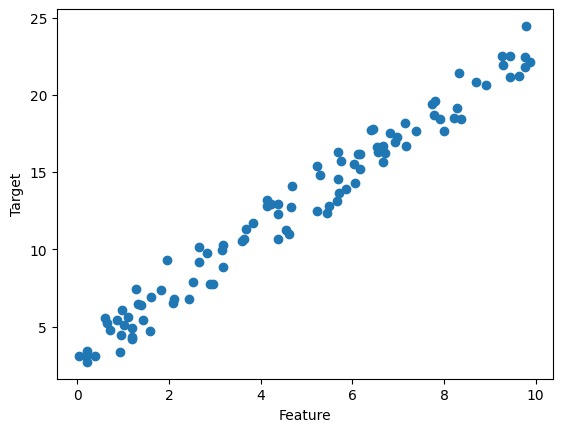

In [98]:
plt.scatter(data.Feature, data.Target)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

- Blue dots are the datapoints scattered
- Red line is the expected plot for x and y = 2x + 3

#### Expected

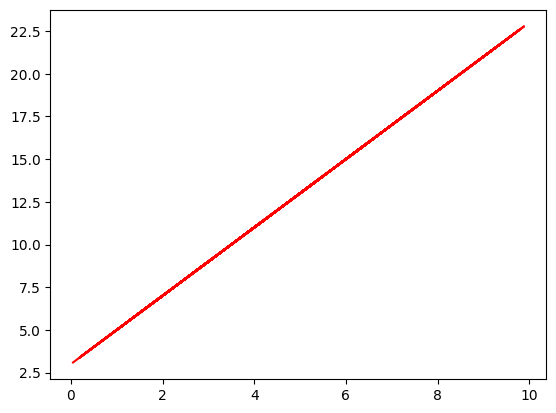

In [99]:
plt.plot(data.Feature, (2 * data.Feature + 3), color='red')
plt.show()

#### Reality (plotting every point in a line be like:

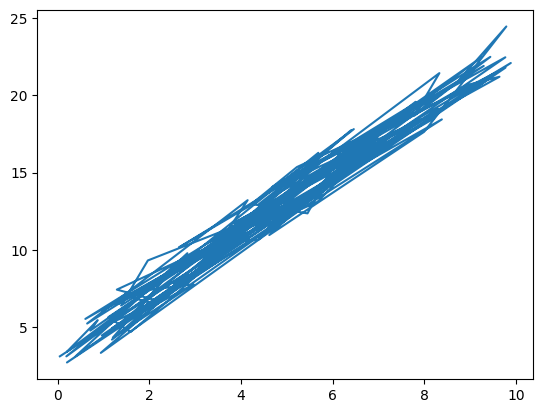

In [100]:
plt.plot(data.Feature, data.Target)
plt.show()

#### How we actually start

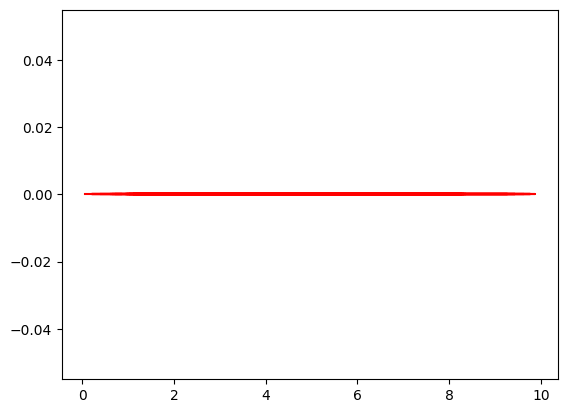

In [101]:
plt.plot(data.Feature, (0 * data.Feature + 0), color='red')
plt.show()

### The Implementation

#### Step 0: Initial parameters

In [102]:
X = data.Feature
y = data.Target

In [103]:
w_current, b_current = 0, 0

#### Step 1: Mean Squared Error

##### Observed Values

In [104]:
y.head()

0    12.811120
1    18.204614
2    15.520930
3    12.361420
4    12.961348
Name: Target, dtype: float64

##### Calculated Values (again when w = 2 and b = 3)

In [105]:
2 * X.head() + 3

0    13.976270
1    17.303787
2    15.055268
3    13.897664
4    11.473096
Name: Feature, dtype: float64

##### Where we starting w = 0 and b = 0

In [106]:
y_pred = w_current * X + b_current
y_pred

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
95    0.0
96    0.0
97    0.0
98    0.0
99    0.0
Name: Feature, Length: 100, dtype: float64

In [107]:
# Make a function!
def predict(w, b, x):
    return w * x + b

##### Actual - Predicted value squared (when we literally take w and b to be 2 and 3)

In [108]:
1 / n * (y - (2 * X + 3))**2

0     0.013576
1     0.008115
2     0.002168
3     0.023600
4     0.022149
        ...   
95    0.004646
96    0.006455
97    0.004755
98    0.002075
99    0.000003
Length: 100, dtype: float64

##### Starting point

In [109]:
1 / n * (y - y_pred)**2

0     1.641248
1     3.314080
2     2.408993
3     1.528047
4     1.679965
        ...   
95    0.539552
96    1.939571
97    0.073582
98    3.656994
99    0.096807
Length: 100, dtype: float64

##### MSE (when w = 2 and b = 3)

In [110]:
1 / n * np.sum((y - (2 * X + 3))**2)

1.0297617241074746

##### Actual MSE

In [111]:
E = 1 / n * np.sum((y - y_pred)**2)
E

194.00746737436876

In [112]:
# Make it a function!
def calculate_mse(y_actual, y_prediction):
    return 1 / n * np.sum((y_actual - y_prediction)**2)

In [113]:
calculate_mse(y, y_pred)

194.00746737436876

#### Step 2: Gradient Descent Formula

In [114]:
def calculate_weight_derivative(x, y_actual, y_prediction):
    return - 2 / n * np.sum(x * (y_actual - y_prediction))

In [115]:
calculate_weight_derivative(X, y, y_pred)

-152.74221581997543

In [116]:
def calculate_bias_derivative(y_actual, y_prediction):
    return - 2/n * np.sum((y_actual - y_prediction))

In [117]:
calculate_bias_derivative(y, y_pred)

-25.29642226865496

#### Step 3: The Loop and working with hyperparameters

In [118]:
# Hyperparameters - things we control
learning_rate = 0.005
epochs = 1000

In [119]:
for i in range(epochs):
    y_pred = predict(w_current, b_current, X)

    mse = calculate_mse(y, y_pred)

    # Derivatives
    dE_dw = calculate_weight_derivative(X, y, y_pred)
    dE_db = calculate_bias_derivative(y, y_pred)

    w_current = w_current - learning_rate * dE_dw
    b_current = b_current - learning_rate * dE_db

    if i % 100 == 0:
        print(f"Training after {i} epochs:\nWeight - {w_current}\nBias - {b_current}")

Training after 0 epochs:
Weight - 0.7637110790998771
Bias - 0.1264821113432748
Training after 100 epochs:
Weight - 2.332034247979209
Bias - 1.0466317630476747
Training after 200 epochs:
Weight - 2.253256694419183
Bias - 1.5531687126131053
Training after 300 epochs:
Weight - 2.1928213092832216
Bias - 1.9417661524822656
Training after 400 epochs:
Weight - 2.146457394545137
Bias - 2.239884523516044
Training after 500 epochs:
Weight - 2.110888619976986
Bias - 2.468590515963542
Training after 600 epochs:
Weight - 2.0836014995639043
Bias - 2.644045758121257
Training after 700 epochs:
Weight - 2.0626677747033155
Bias - 2.778648886229889
Training after 800 epochs:
Weight - 2.0466081528045983
Bias - 2.8819117005739754
Training after 900 epochs:
Weight - 2.034287772306271
Bias - 2.9611313218123136


In [120]:
print(f"Result: Weight={w_current:.3f}, Bias={b_current:.3f}")
print(f"Mean Squared Error: {mse}")

Result: Weight=2.025, Bias=3.021
Mean Squared Error: 1.0034253145371475


### Final Plot

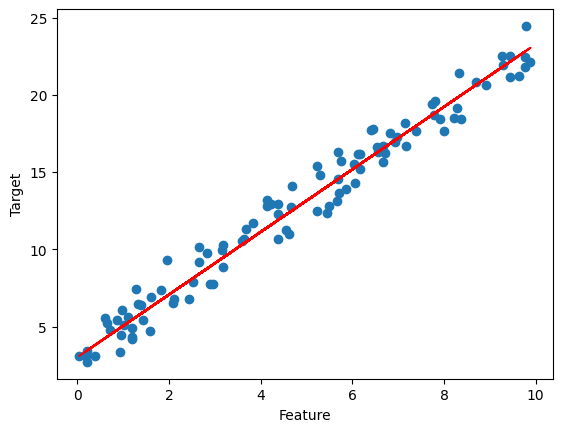

In [122]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()